In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [2]:
X,y = make_classification(n_features=30, random_state=42)

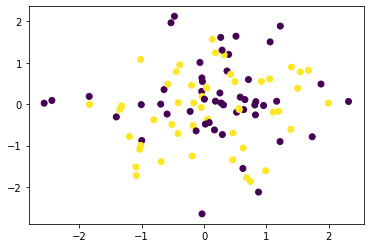

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
x_mean = X.mean(axis=0)
x2 = X - x_mean
sigma = x2.T @ x2
vecs, mags, *_ = np.linalg.svd(sigma)
my_x = x2 @ vecs

In [5]:
sk_pca = PCA(n_components= 3, svd_solver='full')
x_sk = sk_pca.fit_transform(x2)

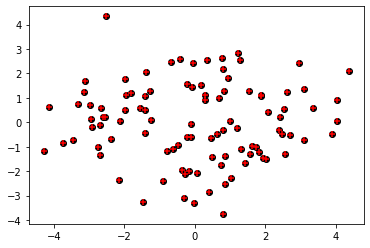

In [6]:
plt.scatter(x_sk[:,0], x_sk[:,1], c='k')
plt.scatter(-my_x[:,0], my_x[:,1], c='r', marker='+')

In [12]:
import numpy as np

class SimplePCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X, y=None):
        self.means = X.mean(axis=0)
        x2 = X - self.means
        sigma = x2.T @ x2
        vecs, self.mags, *_ = np.linalg.svd(sigma)
        self.components_ = vecs[:, :self.n_components] if self.n_components else vecs
        return self
    
    def trasform(self, X, y=None):
        return X @ self.components_
    
    def reverse_transform(self,X,y=None):
        return X @ self.components_.T

In [13]:
test = SimplePCA(n_components=2)
test.fit(X)
x_test = test.trasform(X)

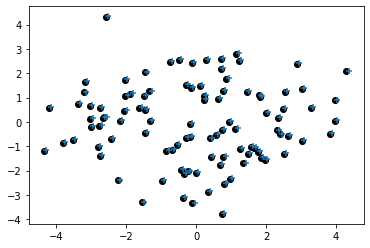

In [14]:
plt.scatter(-x_test[:,0], x_test[:,1], c='k')
plt.scatter(x_sk[:,0], x_sk[:,1], marker='+')

In [15]:
test = SimplePCA(n_components=1)
test.fit(X)
x_test = test.trasform(X)

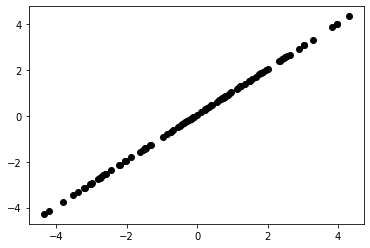

In [16]:
plt.scatter(-x_test[:,0], x_sk[:,0], c='k')